In [1]:
# Importing necessary Libraries
import sqlite3
import pandas as pd
from datetime import datetime,timedelta
import random

In [2]:
conn = sqlite3.connect("sales_data.db") # Connect to SQLite database (creates file if it doesn’t exist)
cursor = conn.cursor()

In [3]:
cursor.execute("DROP TABLE IF EXISTS sales") # Drop table if it exists (for clean reruns)

In [4]:
# Creating the 'sales' table
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date TEXT,
    product TEXT,
    category TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [5]:
# Sample data
products = [
    ("Apple iPhone 13", "Electronics", 799),
    ("Samsung Galaxy S21", "Electronics", 699),
    ("Sony WH-1000XM4", "Electronics", 299),
    ("Nike Air Max", "Footwear", 120),
    ("Adidas Ultraboost", "Footwear", 180),
    ("Levi's Jeans", "Apparel", 60),
    ("Puma Hoodie", "Apparel", 50),
]

In [6]:
# Generating 50 random sales records
start_date = datetime(2023, 1, 1)
data = []

In [7]:
for _ in range(50):
    product, category, price = random.choice(products)
    quantity = random.randint(1, 5)
    sale_date = start_date + timedelta(days=random.randint(0, 180))
    data.append((sale_date.strftime('%Y-%m-%d'), product, category, quantity, price))

In [8]:
# Inserting into table
cursor.executemany("INSERT INTO sales (date, product, category, quantity, price) VALUES (?, ?, ?, ?, ?)", data)

In [9]:
conn.commit()
conn.close()

In [10]:
# Reconnecting to database
conn = sqlite3.connect("sales_data.db")

In [11]:
query = """
SELECT 
    product,
    category,
    SUM(quantity) AS total_qty,
    ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product, category
ORDER BY revenue DESC
"""

df = pd.read_sql_query(query, conn)

In [12]:
# Displaying top products
print("📊 Sales Summary Top Products:\n")
print(df)

📊 Sales Summary Top Products:

              product     category  total_qty  revenue
0     Apple iPhone 13  Electronics         33  26367.0
1  Samsung Galaxy S21  Electronics         18  12582.0
2     Sony WH-1000XM4  Electronics         15   4485.0
3        Nike Air Max     Footwear         36   4320.0
4   Adidas Ultraboost     Footwear         16   2880.0
5        Levi's Jeans      Apparel         24   1440.0
6         Puma Hoodie      Apparel         11    550.0


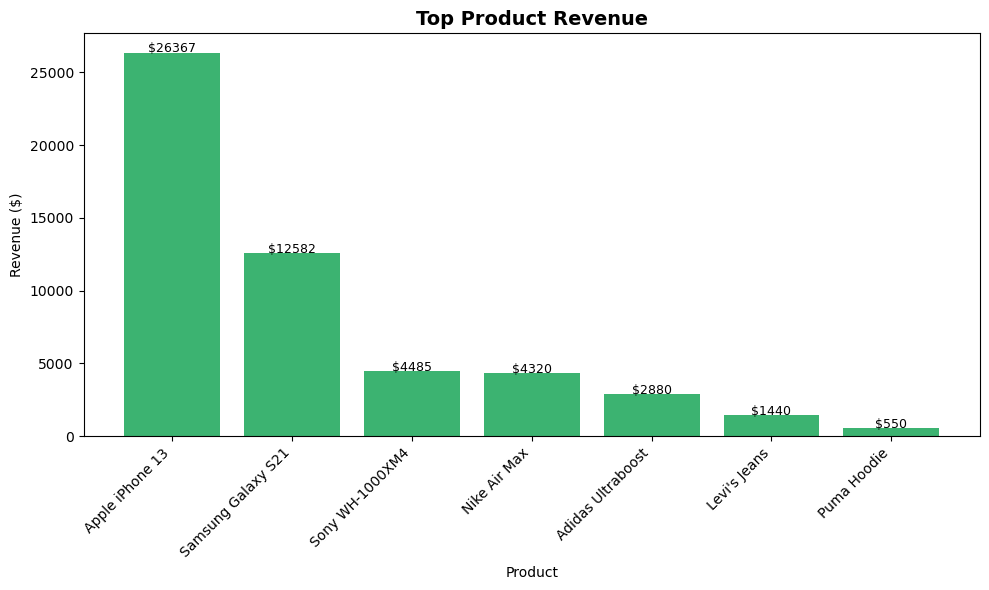

In [13]:
# Importing visualization library and creating bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(df['product'], df['revenue'], color='mediumseagreen')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title("Top Product Revenue", fontsize=14, weight='bold')
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()

# Adding labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f"${height:.0f}", ha='center', fontsize=9)

plt.show()

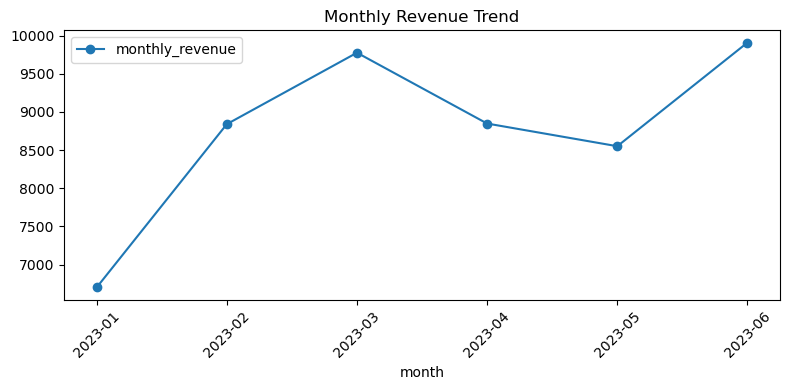

In [14]:
# Creating monthly revenue trend using line chart
query = """
SELECT 
    strftime('%Y-%m', date) AS month,
    ROUND(SUM(quantity * price), 2) AS monthly_revenue
FROM sales
GROUP BY month
ORDER BY month
"""
df_monthly = pd.read_sql_query(query, conn)

df_monthly.plot(x='month', y='monthly_revenue', kind='line', marker='o', figsize=(8, 4), title="Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

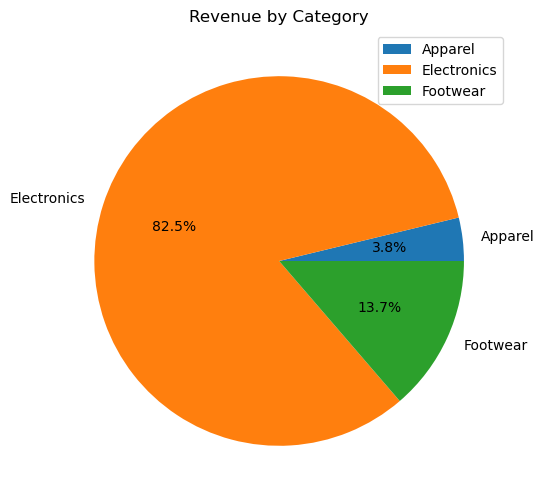

In [15]:
# Creating a pie chart for Revenue by Category
query = """
SELECT 
    category, 
    ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY category
"""
df_cat = pd.read_sql_query(query, conn)

# Pie chart
df_cat.plot.pie(y='revenue', labels=df_cat['category'], autopct='%1.1f%%', figsize=(6,6), title="Revenue by Category")
plt.ylabel("")
plt.show()

In [16]:
# Export data as CSV
# df.to_csv("sales_summary.csv", index=False)
conn.close() # Closing the database